# Backtesting Investment Strategies

## Importing the Data

In [1]:
import pandas as pd
pd.read_csv("dji.csv").info()
data = pd.read_csv("dji.csv", parse_dates = ["Date"], index_col = "Date")
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5785 entries, 0 to 5784
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5785 non-null   object 
 1   Open       5785 non-null   float64
 2   High       5785 non-null   float64
 3   Low        5785 non-null   float64
 4   Close      5785 non-null   float64
 5   Adj Close  5785 non-null   float64
 6   Volume     5785 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 316.5+ KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-01,11219.540039,11313.599609,11219.540039,11238.780273,11238.780273,125140000
2000-09-05,11221.759766,11301.669922,11184.769531,11260.610352,11260.610352,174500000
2000-09-06,11253.580078,11401.190430,11253.209961,11310.639648,11310.639648,224760000
2000-09-07,11316.009766,11323.870117,11223.240234,11259.870117,11259.870117,222220000
2000-09-08,11261.719727,11261.719727,11191.049805,11220.650391,11220.650391,181620000
...,...,...,...,...,...,...
2023-08-25,34217.058594,34441.910156,34029.218750,34346.898438,34346.898438,257440000
2023-08-28,34441.640625,34652.910156,34441.640625,34559.980469,34559.980469,224640000
2023-08-29,34531.121094,34864.421875,34531.121094,34852.671875,34852.671875,262550000


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5785 entries, 2000-09-01 to 2023-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5785 non-null   float64
 1   High       5785 non-null   float64
 2   Low        5785 non-null   float64
 3   Close      5785 non-null   float64
 4   Adj Close  5785 non-null   float64
 5   Volume     5785 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 316.4 KB


In [3]:
df = data.loc["2000-09-01": "2023-09-01", "Close"].to_frame()
df

,Close
Date,
2000-09-01,11238.780273
2000-09-05,11260.610352
2000-09-06,11310.639648
2000-09-07,11259.870117
2000-09-08,11220.650391
...,...
2023-08-25,34346.898438
2023-08-28,34559.980469
2023-08-29,34852.671875


## Data Visualization & Returns

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df.describe()

,Close
count,5785.000000
mean,16958.824301
std,8159.187991
min,6547.049805
25%,10559.230469
50%,13197.730469
75%,23271.279297
max,36799.648438


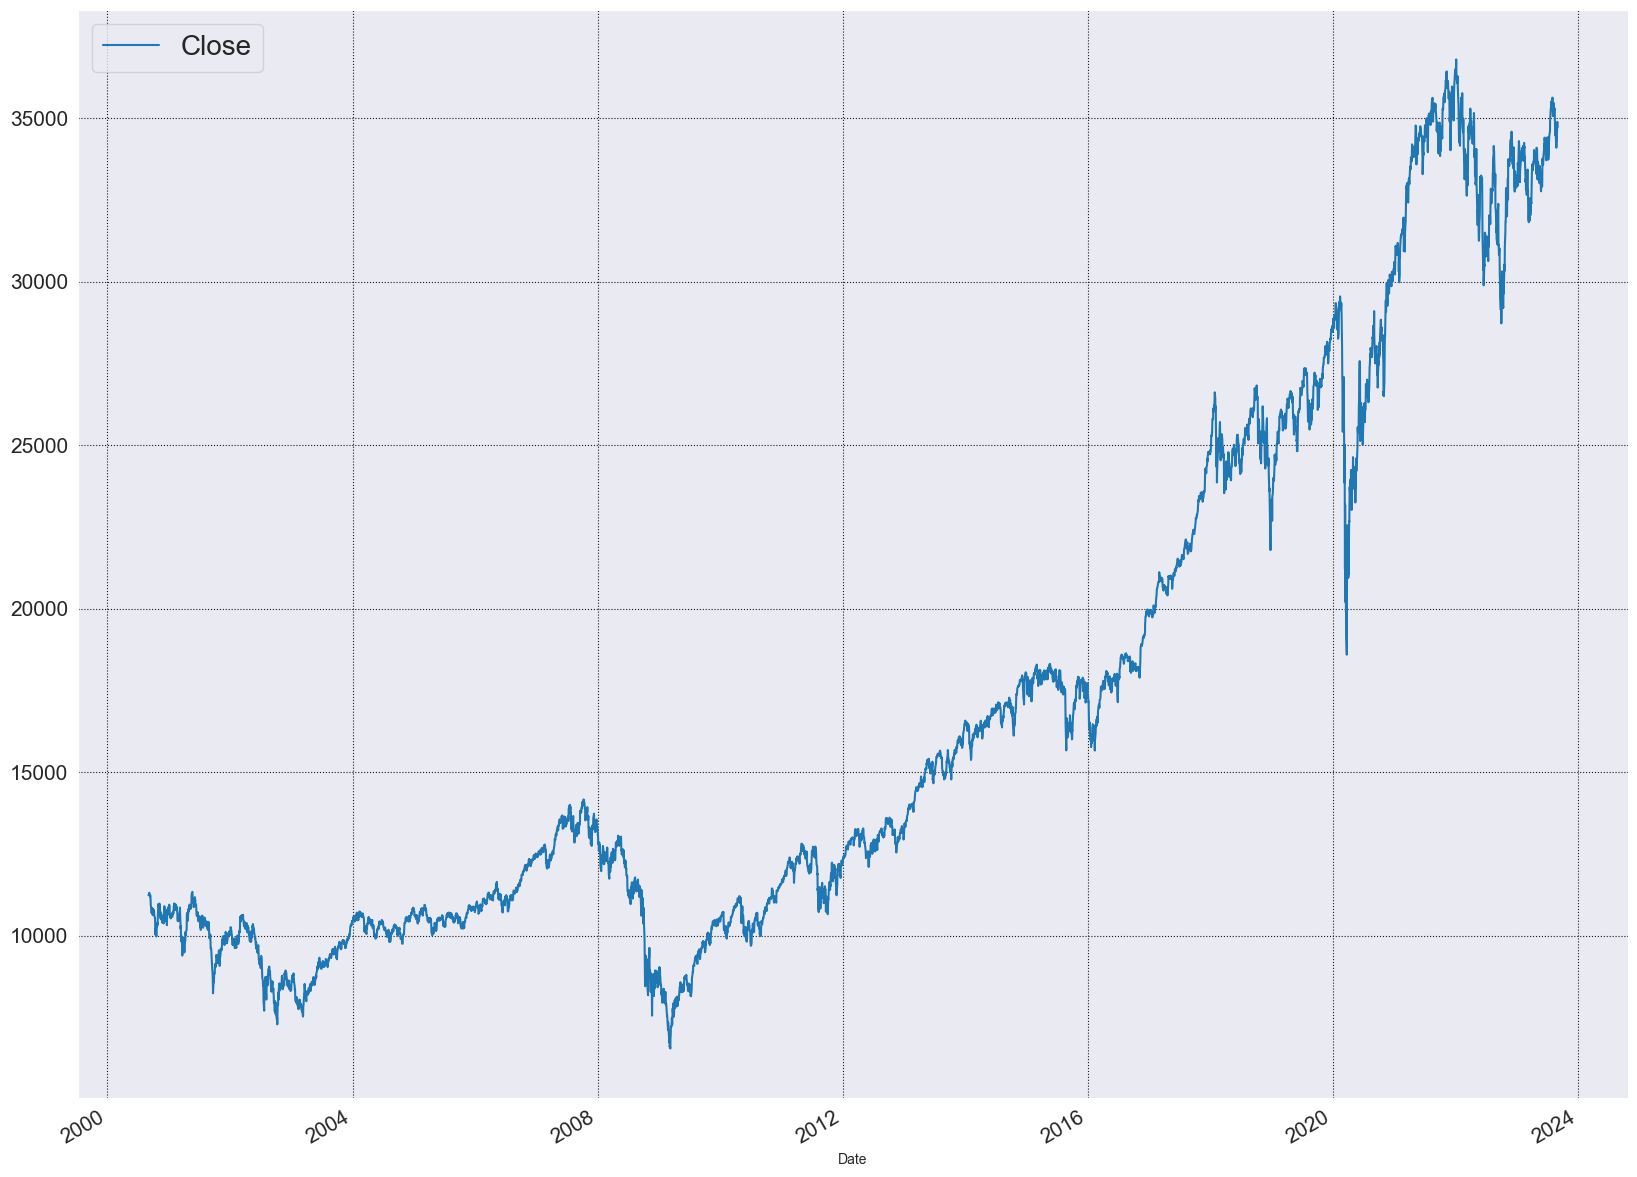

In [6]:
sns.set_style("darkgrid", {"grid.color": ".1", "grid.linestyle": ":"})
df.plot(figsize = (20, 16), fontsize = 15)
plt.legend(fontsize = 20)
plt.show()

In [7]:
df["Return"] = df.pct_change()
df

,Close,Return
Date,,
2000-09-01,11238.780273,NaN
2000-09-05,11260.610352,0.001942
2000-09-06,11310.639648,0.004443
2000-09-07,11259.870117,-0.004489
2000-09-08,11220.650391,-0.003483
...,...,...
2023-08-25,34346.898438,0.007258
2023-08-28,34559.980469,0.006204
2023-08-29,34852.671875,0.008469


In [8]:
df.dropna(inplace = True)
df.rename(columns = {"Close":"DJI_Close", "Return":"DJI_Return"}, inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2000-09-05,11260.610352,0.001942
2000-09-06,11310.639648,0.004443
2000-09-07,11259.870117,-0.004489
2000-09-08,11220.650391,-0.003483
2000-09-11,11195.490234,-0.002242
...,...,...
2023-08-25,34346.898438,0.007258
2023-08-28,34559.980469,0.006204
2023-08-29,34852.671875,0.008469


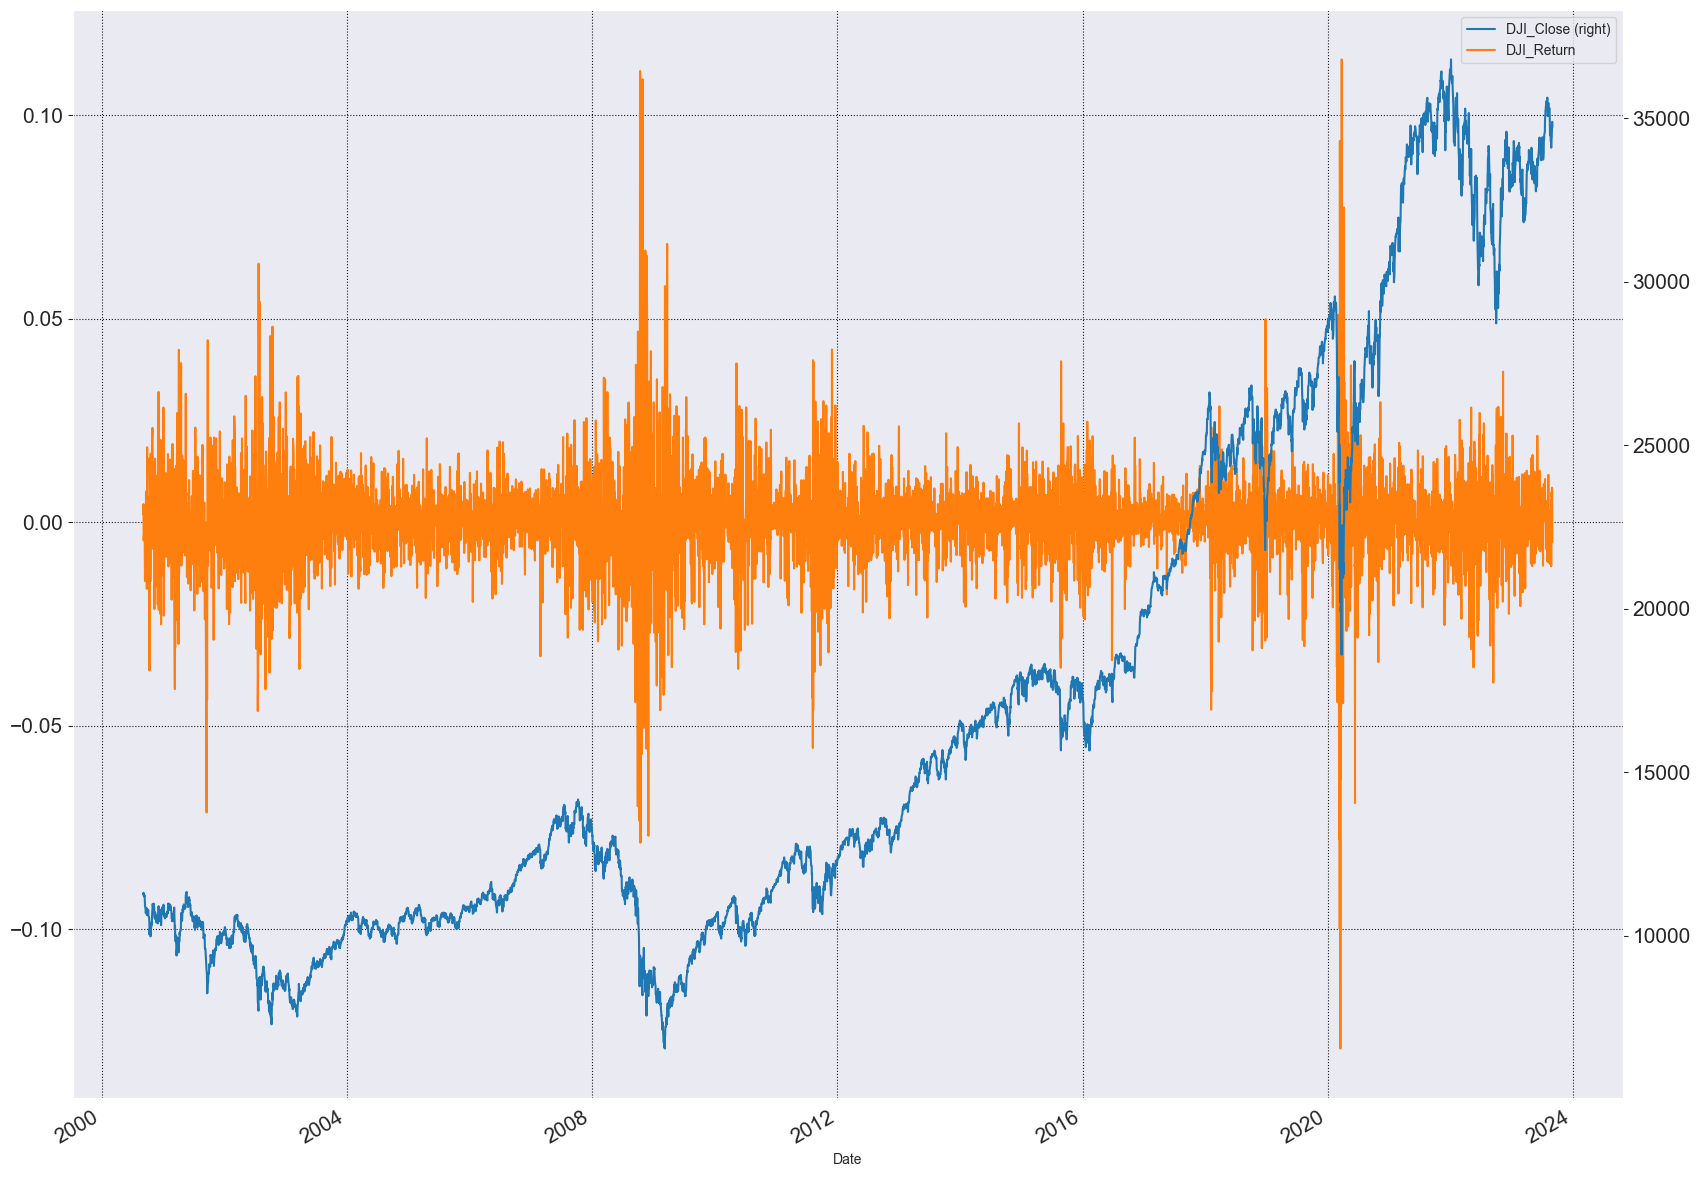

In [9]:
df.plot(figsize = (20, 16), secondary_y = "DJI_Close", mark_right = True, fontsize = 15)
plt.show()

## Backtesting a simple Momentum Strategy

__Positions__:

+1: Investing in DJI (__long__ position) <br>
-1: Short Selling DJI (__short__ position)<br>
0: No position (__neutral__)

__Strategies__: Buy and Hold vs Simple Momentum

__Buy and Hold__: Initially Investing into DJI and do nothing (Position: +1 on any given day)

__Simple Momentum__ (active Strategy to be tested): <br>
a) Investing (+1) into DJI tomorrow if today´s return was positive <br>
b) Short selling (-1) DJI tomorrow if today´s return was negative

In [10]:
df

,DJI_Close,DJI_Return
Date,,
2000-09-05,11260.610352,0.001942
2000-09-06,11310.639648,0.004443
2000-09-07,11259.870117,-0.004489
2000-09-08,11220.650391,-0.003483
2000-09-11,11195.490234,-0.002242
...,...,...
2023-08-25,34346.898438,0.007258
2023-08-28,34559.980469,0.006204
2023-08-29,34852.671875,0.008469


In [11]:
df = data.loc["2014":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2014-01-03,16469.990234,0.001742
2014-01-06,16425.099609,-0.002726
2014-01-07,16530.939453,0.006444
2014-01-08,16462.740234,-0.004126
2014-01-09,16444.759766,-0.001092
...,...,...
2023-08-25,34346.898438,0.007258
2023-08-28,34559.980469,0.006204
2023-08-29,34852.671875,0.008469


In [12]:
df["Position"] = np.sign(df["DJI_Return"])
df

,DJI_Close,DJI_Return,Position
Date,,,
2014-01-03,16469.990234,0.001742,1.0
2014-01-06,16425.099609,-0.002726,-1.0
2014-01-07,16530.939453,0.006444,1.0
2014-01-08,16462.740234,-0.004126,-1.0
2014-01-09,16444.759766,-0.001092,-1.0
...,...,...,...
2023-08-25,34346.898438,0.007258,1.0
2023-08-28,34559.980469,0.006204,1.0
2023-08-29,34852.671875,0.008469,1.0


In [13]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2014-01-03,16469.990234,0.001742,1.0,NaN
2014-01-06,16425.099609,-0.002726,-1.0,-0.002726
2014-01-07,16530.939453,0.006444,1.0,-0.006444
2014-01-08,16462.740234,-0.004126,-1.0,-0.004126
2014-01-09,16444.759766,-0.001092,-1.0,0.001092
...,...,...,...,...
2023-08-25,34346.898438,0.007258,1.0,-0.007258
2023-08-28,34559.980469,0.006204,1.0,0.006204
2023-08-29,34852.671875,0.008469,1.0,0.008469


In [14]:
df.Strategy_Ret.add(1, fill_value = 0).cumprod()
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2014-01-03,16469.990234,0.001742,1.0,NaN,16469.990234
2014-01-06,16425.099609,-0.002726,-1.0,-0.002726,16425.099609
2014-01-07,16530.939453,0.006444,1.0,-0.006444,16319.259766
2014-01-08,16462.740234,-0.004126,-1.0,-0.004126,16251.933842
2014-01-09,16444.759766,-0.001092,-1.0,0.001092,16269.684070
...,...,...,...,...,...
2023-08-25,34346.898438,0.007258,1.0,-0.007258,9313.149296
2023-08-28,34559.980469,0.006204,1.0,0.006204,9370.926413
2023-08-29,34852.671875,0.008469,1.0,0.008469,9450.289583


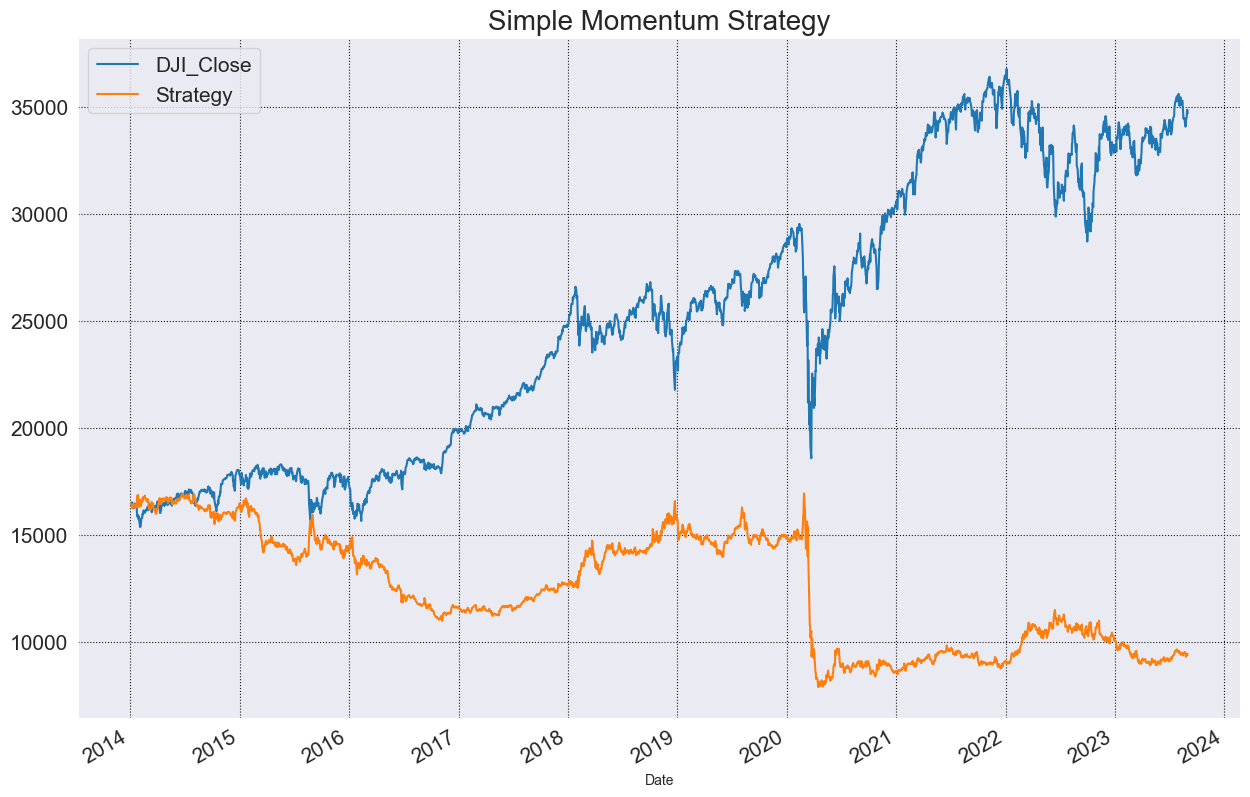

In [15]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.title("Simple Momentum Strategy", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [16]:
def summary_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Return"] = summary["mean"] * 252
    summary["Risk"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [17]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.093213,0.17699
Strategy_Ret,-0.042142,0.17707


## Backtesting a simple Contrarian Strategy

__Strategies__: Buy and Hold vs Simple Contrarian

__Buy and Hold__ (Basic Strategy): Initially Investing into DJI and do nothing (Position: +1 on all days)

__Simple Contrarian__: <br>
a) Short Selling (-1) DJI tomorrow if today´s return was positive <br>
b) Investing (+1) into DJI tomorrow if today´s return was negative

In [18]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-01,11219.540039,11313.599609,11219.540039,11238.780273,11238.780273,125140000
2000-09-05,11221.759766,11301.669922,11184.769531,11260.610352,11260.610352,174500000
2000-09-06,11253.580078,11401.190430,11253.209961,11310.639648,11310.639648,224760000
2000-09-07,11316.009766,11323.870117,11223.240234,11259.870117,11259.870117,222220000
2000-09-08,11261.719727,11261.719727,11191.049805,11220.650391,11220.650391,181620000
...,...,...,...,...,...,...
2023-08-25,34217.058594,34441.910156,34029.218750,34346.898438,34346.898438,257440000
2023-08-28,34441.640625,34652.910156,34441.640625,34559.980469,34559.980469,224640000
2023-08-29,34531.121094,34864.421875,34531.121094,34852.671875,34852.671875,262550000


In [19]:
df = data.loc["2014":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2014-01-03,16469.990234,0.001742
2014-01-06,16425.099609,-0.002726
2014-01-07,16530.939453,0.006444
2014-01-08,16462.740234,-0.004126
2014-01-09,16444.759766,-0.001092
...,...,...
2023-08-25,34346.898438,0.007258
2023-08-28,34559.980469,0.006204
2023-08-29,34852.671875,0.008469


In [20]:
df["Position"] = -np.sign(df["DJI_Return"])
df

,DJI_Close,DJI_Return,Position
Date,,,
2014-01-03,16469.990234,0.001742,-1.0
2014-01-06,16425.099609,-0.002726,1.0
2014-01-07,16530.939453,0.006444,-1.0
2014-01-08,16462.740234,-0.004126,1.0
2014-01-09,16444.759766,-0.001092,1.0
...,...,...,...
2023-08-25,34346.898438,0.007258,-1.0
2023-08-28,34559.980469,0.006204,-1.0
2023-08-29,34852.671875,0.008469,-1.0


In [21]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2014-01-03,16469.990234,0.001742,-1.0,NaN
2014-01-06,16425.099609,-0.002726,1.0,0.002726
2014-01-07,16530.939453,0.006444,-1.0,0.006444
2014-01-08,16462.740234,-0.004126,1.0,0.004126
2014-01-09,16444.759766,-0.001092,1.0,-0.001092
...,...,...,...,...
2023-08-25,34346.898438,0.007258,-1.0,0.007258
2023-08-28,34559.980469,0.006204,-1.0,-0.006204
2023-08-29,34852.671875,0.008469,-1.0,-0.008469


In [22]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2014-01-03,16469.990234,0.001742,-1.0,NaN,16469.990234
2014-01-06,16425.099609,-0.002726,1.0,0.002726,16514.880859
2014-01-07,16530.939453,0.006444,-1.0,0.006444,16621.299234
2014-01-08,16462.740234,-0.004126,1.0,0.004126,16689.871237
2014-01-09,16444.759766,-0.001092,1.0,-0.001092,16671.642698
...,...,...,...,...,...
2023-08-25,34346.898438,0.007258,-1.0,0.007258,21518.799458
2023-08-28,34559.980469,0.006204,-1.0,-0.006204,21385.300665
2023-08-29,34852.671875,0.008469,-1.0,-0.008469,21204.186739


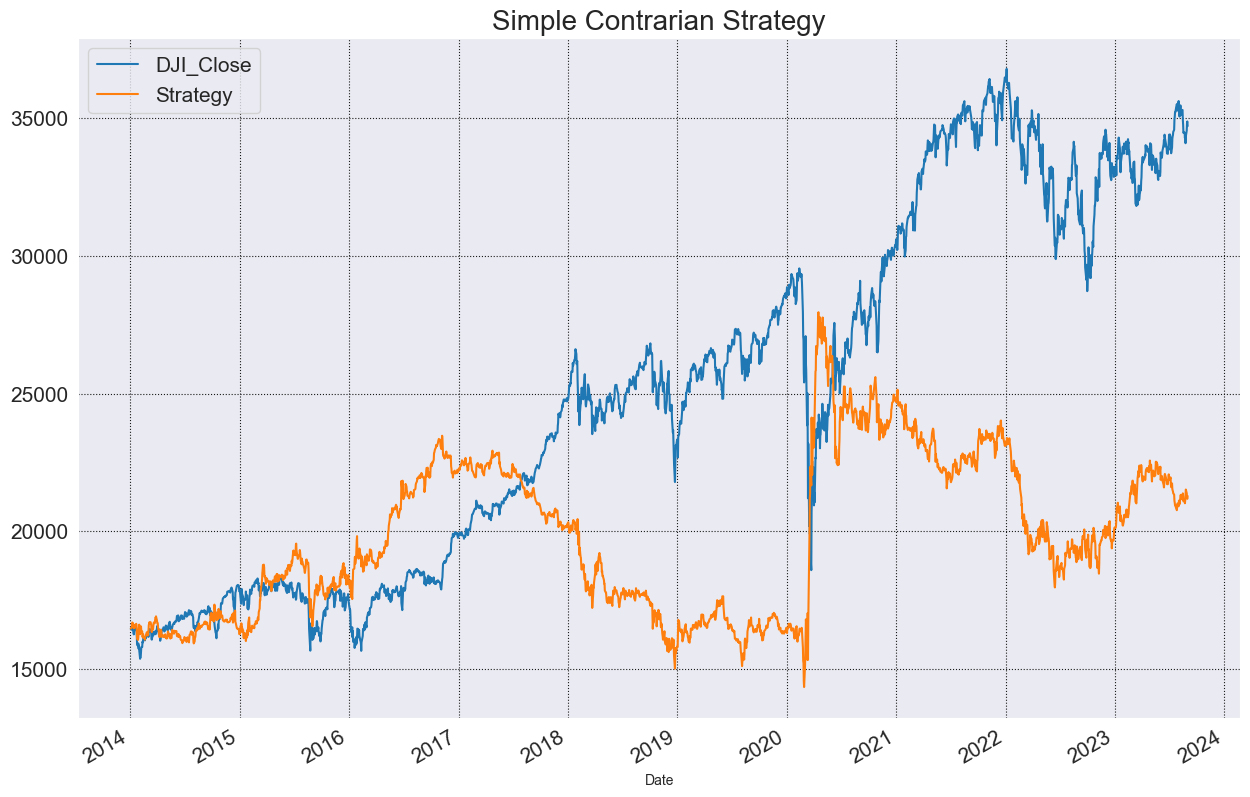

In [23]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Simple Contrarian Strategy", fontsize = 20)
plt.show()

In [24]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.093213,0.17699
Strategy_Ret,0.042142,0.17707


## More complex Strategies & Backtesting vs. Fitting

In [25]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-01,11219.540039,11313.599609,11219.540039,11238.780273,11238.780273,125140000
2000-09-05,11221.759766,11301.669922,11184.769531,11260.610352,11260.610352,174500000
2000-09-06,11253.580078,11401.190430,11253.209961,11310.639648,11310.639648,224760000
2000-09-07,11316.009766,11323.870117,11223.240234,11259.870117,11259.870117,222220000
2000-09-08,11261.719727,11261.719727,11191.049805,11220.650391,11220.650391,181620000
...,...,...,...,...,...,...
2023-08-25,34217.058594,34441.910156,34029.218750,34346.898438,34346.898438,257440000
2023-08-28,34441.640625,34652.910156,34441.640625,34559.980469,34559.980469,224640000
2023-08-29,34531.121094,34864.421875,34531.121094,34852.671875,34852.671875,262550000


In [26]:
df = data.loc["2014":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2014-01-03,16469.990234,0.001742
2014-01-06,16425.099609,-0.002726
2014-01-07,16530.939453,0.006444
2014-01-08,16462.740234,-0.004126
2014-01-09,16444.759766,-0.001092
...,...,...
2023-08-25,34346.898438,0.007258
2023-08-28,34559.980469,0.006204
2023-08-29,34852.671875,0.008469


When the returns of the previous day do not pass the threshold set (+0.01) then short the next day

In [27]:
df["Position"] = np.where(df["DJI_Return"] > 0.01, -1, 1)
df

,DJI_Close,DJI_Return,Position
Date,,,
2014-01-03,16469.990234,0.001742,1
2014-01-06,16425.099609,-0.002726,1
2014-01-07,16530.939453,0.006444,1
2014-01-08,16462.740234,-0.004126,1
2014-01-09,16444.759766,-0.001092,1
...,...,...,...
2023-08-25,34346.898438,0.007258,1
2023-08-28,34559.980469,0.006204,1
2023-08-29,34852.671875,0.008469,1


In [28]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2014-01-03,16469.990234,0.001742,1,NaN
2014-01-06,16425.099609,-0.002726,1,-0.002726
2014-01-07,16530.939453,0.006444,1,0.006444
2014-01-08,16462.740234,-0.004126,1,-0.004126
2014-01-09,16444.759766,-0.001092,1,-0.001092
...,...,...,...,...
2023-08-25,34346.898438,0.007258,1,0.007258
2023-08-28,34559.980469,0.006204,1,0.006204
2023-08-29,34852.671875,0.008469,1,0.008469


In [29]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2014-01-03,16469.990234,0.001742,1,NaN,16469.990234
2014-01-06,16425.099609,-0.002726,1,-0.002726,16425.099609
2014-01-07,16530.939453,0.006444,1,0.006444,16530.939453
2014-01-08,16462.740234,-0.004126,1,-0.004126,16462.740234
2014-01-09,16444.759766,-0.001092,1,-0.001092,16444.759766
...,...,...,...,...,...
2023-08-25,34346.898438,0.007258,1,0.007258,67988.091094
2023-08-28,34559.980469,0.006204,1,0.006204,68409.877084
2023-08-29,34852.671875,0.008469,1,0.008469,68989.246136


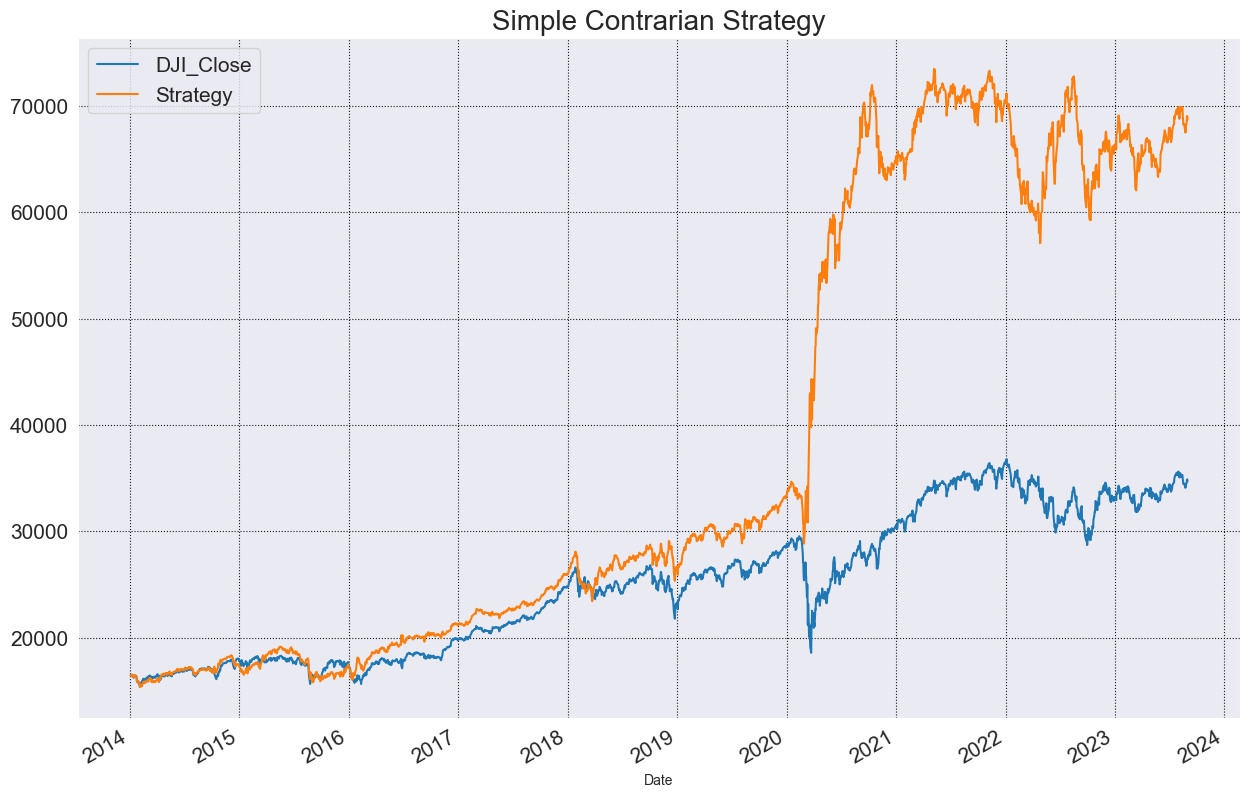

In [30]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Simple Contrarian Strategy", fontsize = 20)
plt.show()

In [31]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.093213,0.176990
Strategy_Ret,0.163667,0.176822


Even if a Strategy seems to outperform the basic Strategy, the following issues need to be considered/analyzed as well: <br>
- Backtesting vs. Fitting: Was the Strategy fitted and optimized on historical data Forward Testing is required!<br>
- Transaction Costs: Changing Positions trigger Cost. Include Costs!<br>
- Tax effects: Changing Positions can trigger (earlier) Tax Payments. Include Taxes!

## Simple Moving Averages (Part 1)

In [32]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-01,11219.540039,11313.599609,11219.540039,11238.780273,11238.780273,125140000
2000-09-05,11221.759766,11301.669922,11184.769531,11260.610352,11260.610352,174500000
2000-09-06,11253.580078,11401.190430,11253.209961,11310.639648,11310.639648,224760000
2000-09-07,11316.009766,11323.870117,11223.240234,11259.870117,11259.870117,222220000
2000-09-08,11261.719727,11261.719727,11191.049805,11220.650391,11220.650391,181620000
...,...,...,...,...,...,...
2023-08-25,34217.058594,34441.910156,34029.218750,34346.898438,34346.898438,257440000
2023-08-28,34441.640625,34652.910156,34441.640625,34559.980469,34559.980469,224640000
2023-08-29,34531.121094,34864.421875,34531.121094,34852.671875,34852.671875,262550000


In [33]:
df = data.loc["2014":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2014-01-03,16469.990234,0.001742
2014-01-06,16425.099609,-0.002726
2014-01-07,16530.939453,0.006444
2014-01-08,16462.740234,-0.004126
2014-01-09,16444.759766,-0.001092
...,...,...
2023-08-25,34346.898438,0.007258
2023-08-28,34559.980469,0.006204
2023-08-29,34852.671875,0.008469


In [34]:
df.DJI_Close.rolling(window = 50).mean()

Date
2014-01-03             NaN
2014-01-06             NaN
2014-01-07             NaN
2014-01-08             NaN
2014-01-09             NaN
                  ...     
2023-08-25    34663.702969
2023-08-28    34666.741406
2023-08-29    34677.812422
2023-08-30    34694.539766
2023-08-31    34709.947578
Name: DJI_Close, Length: 2432, dtype: float64

In [35]:
df["SMA50"] = df.DJI_Close.rolling(window = 50).mean()

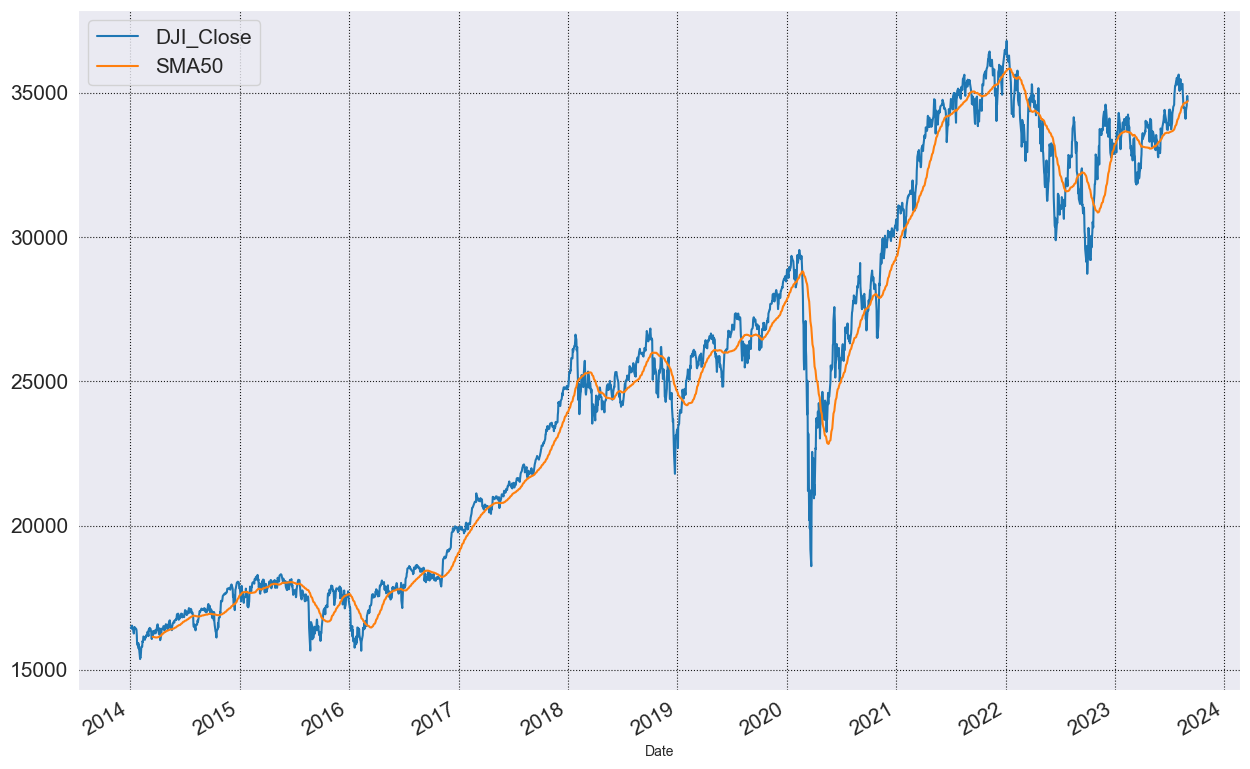

In [36]:
df[["DJI_Close", "SMA50"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [37]:
df["SMA200"] = df.DJI_Close.rolling(window = 200).mean()
df

,DJI_Close,DJI_Return,SMA50,SMA200
Date,,,,
2014-01-03,16469.990234,0.001742,NaN,NaN
2014-01-06,16425.099609,-0.002726,NaN,NaN
2014-01-07,16530.939453,0.006444,NaN,NaN
2014-01-08,16462.740234,-0.004126,NaN,NaN
2014-01-09,16444.759766,-0.001092,NaN,NaN
...,...,...,...,...
2023-08-25,34346.898438,0.007258,34663.702969,33735.358809
2023-08-28,34559.980469,0.006204,34666.741406,33742.354570
2023-08-29,34852.671875,0.008469,34677.812422,33754.048232


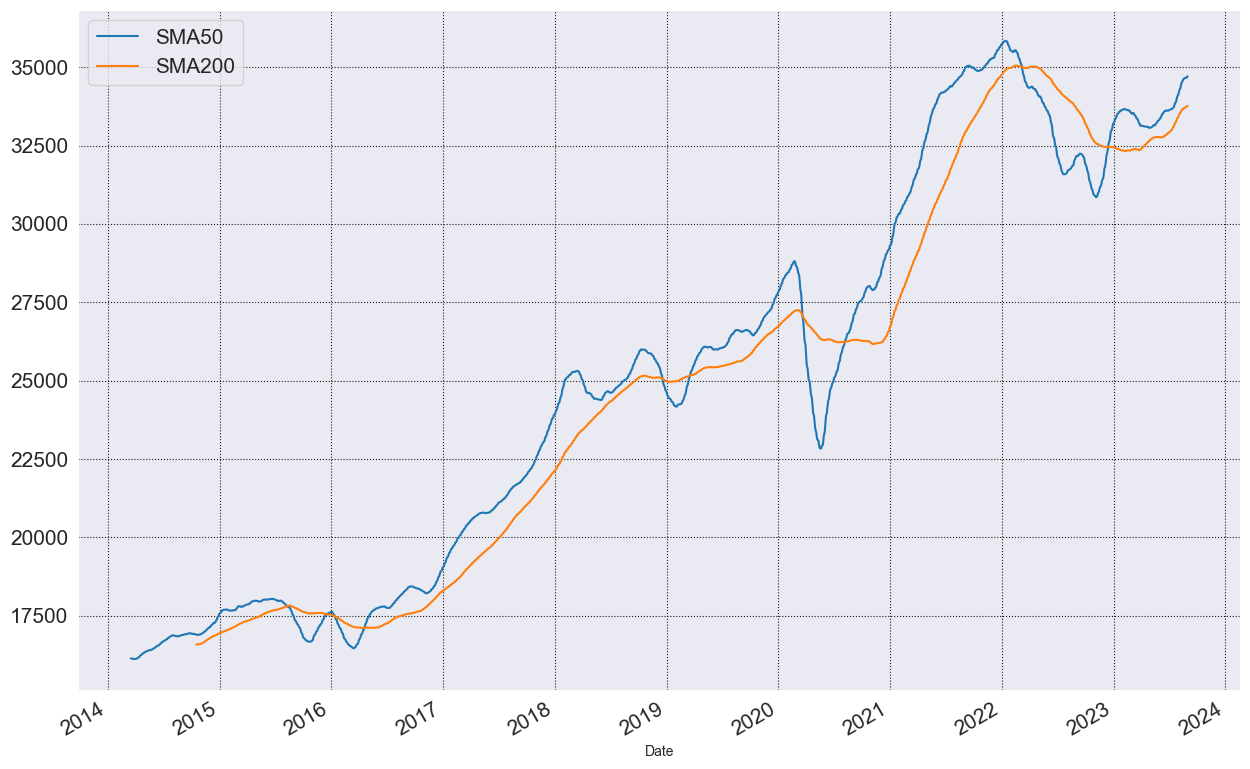

In [38]:
df[["SMA50", "SMA200"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [39]:
df.dropna(inplace= True)
df

,DJI_Close,DJI_Return,SMA50,SMA200
Date,,,,
2014-10-17,16380.410156,0.016328,16896.702910,16586.349272
2014-10-20,16399.669922,0.001176,16893.617715,16585.997671
2014-10-21,16614.810547,0.013119,16894.514316,16586.946226
2014-10-22,16461.320312,-0.009238,16892.529941,16586.598130
2014-10-23,16677.900391,0.013157,16893.051934,16587.673931
...,...,...,...,...
2023-08-25,34346.898438,0.007258,34663.702969,33735.358809
2023-08-28,34559.980469,0.006204,34666.741406,33742.354570
2023-08-29,34852.671875,0.008469,34677.812422,33754.048232


## Simple Moving Averages (Part 2)

__Strategies__: Buy and Hold vs SMA Crossover (Momentum)

__Buy and Hold__ (Basic Strategy): Initially Investing into DJI and do nothing (Position: +1 on all days)

__SMA Crossover (Momentum)__ (Strategy to be tested): <br>
a) Investing (+1): SMA50 __>__ SMA200 <br>
b) Short Selling (-1): SMA50 __<__ SMA200

In [40]:
df["Position"] = np.sign(df.SMA50.sub(df.SMA200)) 
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position
Date,,,,,
2014-10-17,16380.410156,0.016328,16896.702910,16586.349272,1.0
2014-10-20,16399.669922,0.001176,16893.617715,16585.997671,1.0
2014-10-21,16614.810547,0.013119,16894.514316,16586.946226,1.0
2014-10-22,16461.320312,-0.009238,16892.529941,16586.598130,1.0
2014-10-23,16677.900391,0.013157,16893.051934,16587.673931,1.0
...,...,...,...,...,...
2023-08-25,34346.898438,0.007258,34663.702969,33735.358809,1.0
2023-08-28,34559.980469,0.006204,34666.741406,33742.354570,1.0
2023-08-29,34852.671875,0.008469,34677.812422,33754.048232,1.0


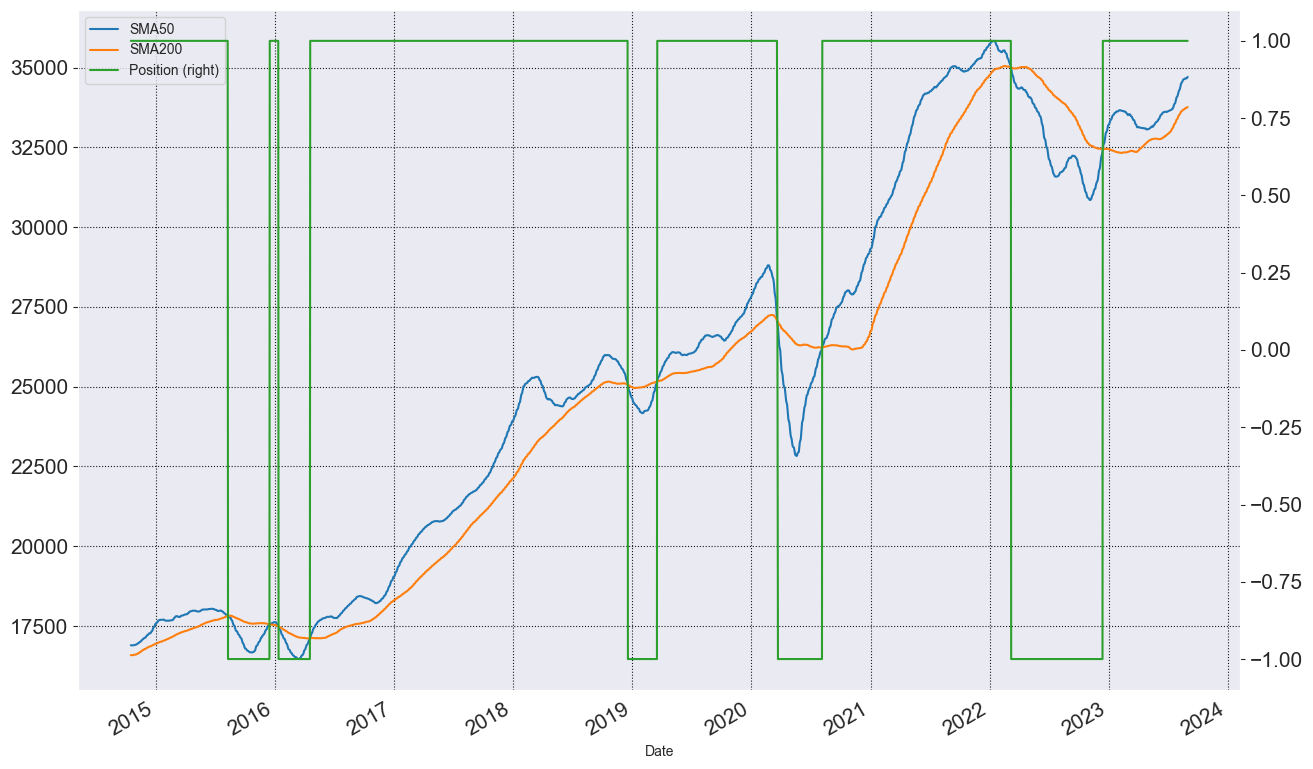

In [41]:
df[["SMA50", "SMA200", "Position"]].plot(figsize = (15, 10), secondary_y = "Position", fontsize = 15)
plt.show()

In [42]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret
Date,,,,,,
2014-10-17,16380.410156,0.016328,16896.702910,16586.349272,1.0,NaN
2014-10-20,16399.669922,0.001176,16893.617715,16585.997671,1.0,0.001176
2014-10-21,16614.810547,0.013119,16894.514316,16586.946226,1.0,0.013119
2014-10-22,16461.320312,-0.009238,16892.529941,16586.598130,1.0,-0.009238
2014-10-23,16677.900391,0.013157,16893.051934,16587.673931,1.0,0.013157
...,...,...,...,...,...,...
2023-08-25,34346.898438,0.007258,34663.702969,33735.358809,1.0,0.007258
2023-08-28,34559.980469,0.006204,34666.741406,33742.354570,1.0,0.006204
2023-08-29,34852.671875,0.008469,34677.812422,33754.048232,1.0,0.008469


In [43]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2014-10-17,16380.410156,0.016328,16896.702910,16586.349272,1.0,NaN,16380.410156
2014-10-20,16399.669922,0.001176,16893.617715,16585.997671,1.0,0.001176,16399.669922
2014-10-21,16614.810547,0.013119,16894.514316,16586.946226,1.0,0.013119,16614.810547
2014-10-22,16461.320312,-0.009238,16892.529941,16586.598130,1.0,-0.009238,16461.320312
2014-10-23,16677.900391,0.013157,16893.051934,16587.673931,1.0,0.013157,16677.900391
...,...,...,...,...,...,...,...
2023-08-25,34346.898438,0.007258,34663.702969,33735.358809,1.0,0.007258,8378.748650
2023-08-28,34559.980469,0.006204,34666.741406,33742.354570,1.0,0.006204,8430.728912
2023-08-29,34852.671875,0.008469,34677.812422,33754.048232,1.0,0.008469,8502.129470


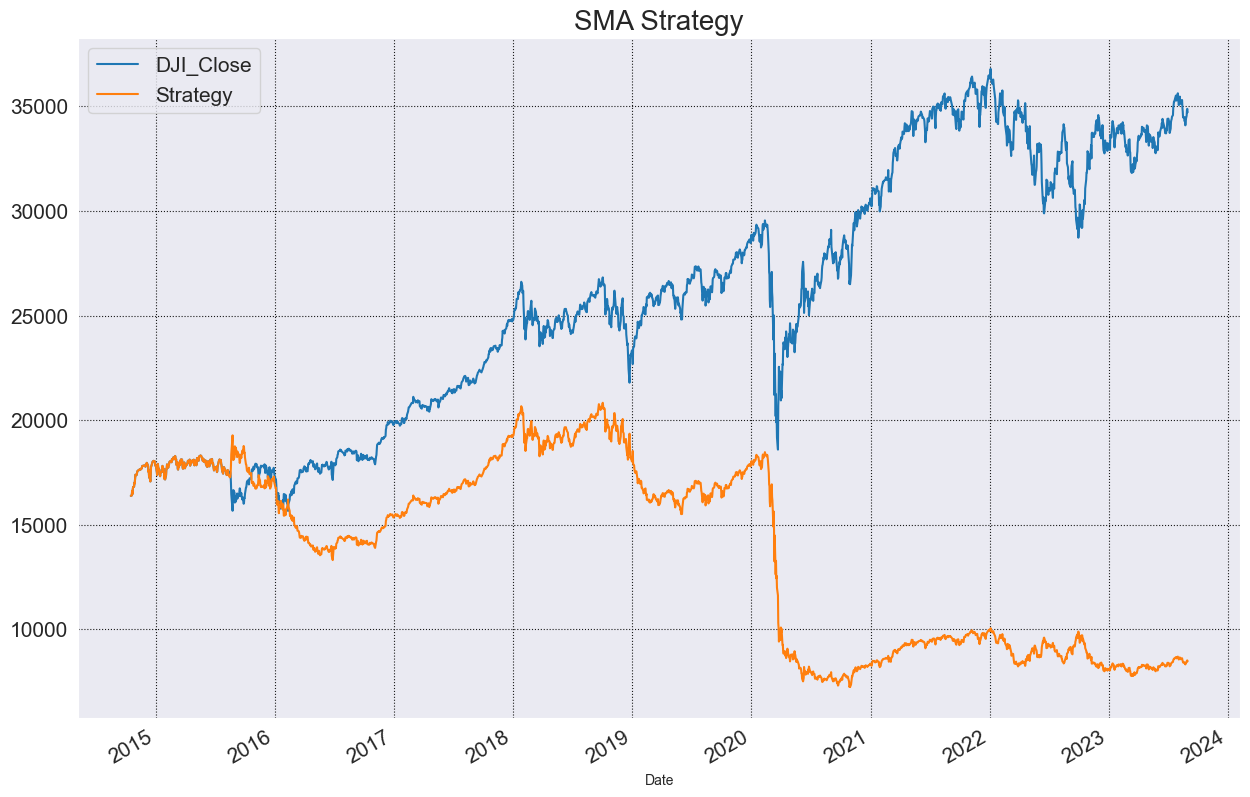

In [44]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("SMA Strategy", fontsize = 20)
plt.show()

In [45]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.103276,0.182027
Strategy_Ret,-0.057654,0.182065


In [46]:
df["Position"] = -np.sign(df.SMA50.sub(df.SMA200)) 
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2014-10-17,16380.410156,0.016328,16896.702910,16586.349272,-1.0,NaN,16380.410156
2014-10-20,16399.669922,0.001176,16893.617715,16585.997671,-1.0,0.001176,16399.669922
2014-10-21,16614.810547,0.013119,16894.514316,16586.946226,-1.0,0.013119,16614.810547
2014-10-22,16461.320312,-0.009238,16892.529941,16586.598130,-1.0,-0.009238,16461.320312
2014-10-23,16677.900391,0.013157,16893.051934,16587.673931,-1.0,0.013157,16677.900391
...,...,...,...,...,...,...,...
2023-08-25,34346.898438,0.007258,34663.702969,33735.358809,-1.0,0.007258,8378.748650
2023-08-28,34559.980469,0.006204,34666.741406,33742.354570,-1.0,0.006204,8430.728912
2023-08-29,34852.671875,0.008469,34677.812422,33754.048232,-1.0,0.008469,8502.129470


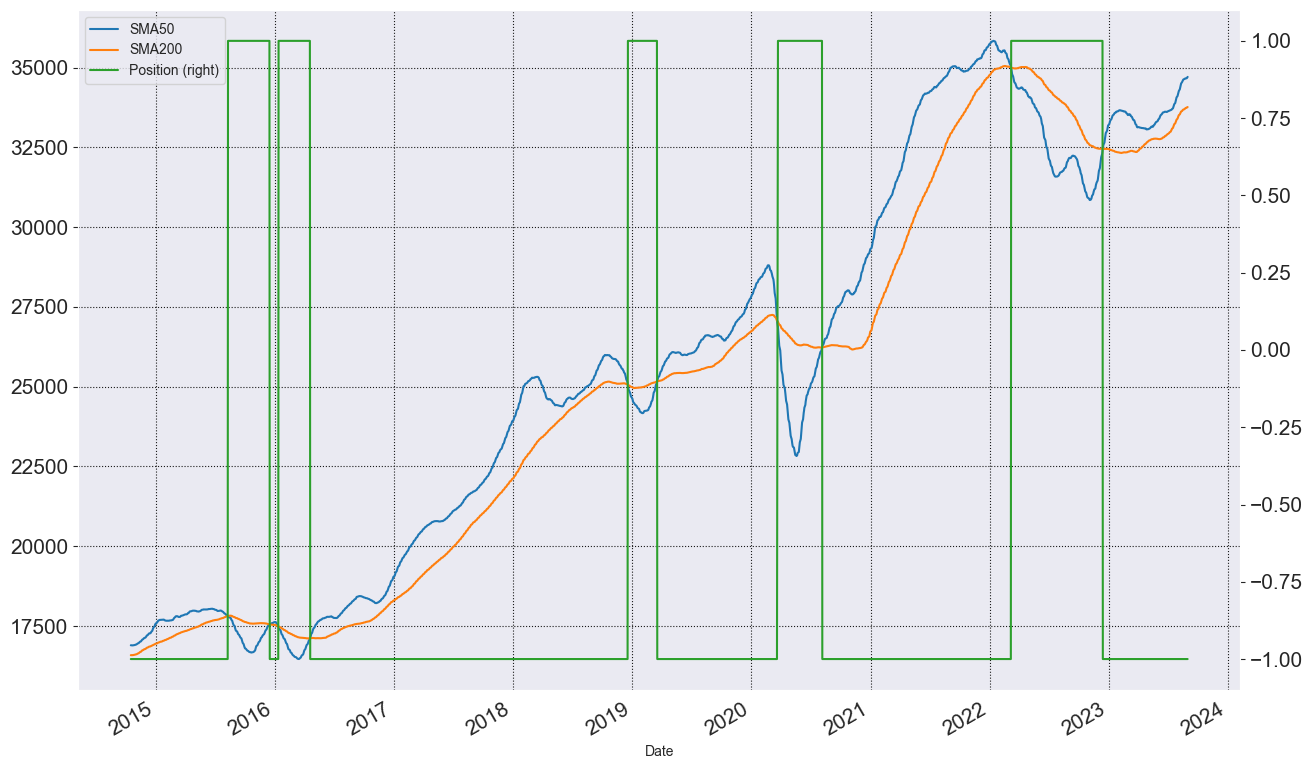

In [47]:
df[["SMA50", "SMA200", "Position"]].plot(figsize = (15, 10), secondary_y = "Position", fontsize = 15)
plt.show()

In [48]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2014-10-17,16380.410156,0.016328,16896.702910,16586.349272,-1.0,NaN,16380.410156
2014-10-20,16399.669922,0.001176,16893.617715,16585.997671,-1.0,-0.001176,16399.669922
2014-10-21,16614.810547,0.013119,16894.514316,16586.946226,-1.0,-0.013119,16614.810547
2014-10-22,16461.320312,-0.009238,16892.529941,16586.598130,-1.0,0.009238,16461.320312
2014-10-23,16677.900391,0.013157,16893.051934,16587.673931,-1.0,-0.013157,16677.900391
...,...,...,...,...,...,...,...
2023-08-25,34346.898438,0.007258,34663.702969,33735.358809,-1.0,-0.007258,8378.748650
2023-08-28,34559.980469,0.006204,34666.741406,33742.354570,-1.0,-0.006204,8430.728912
2023-08-29,34852.671875,0.008469,34677.812422,33754.048232,-1.0,-0.008469,8502.129470


In [49]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2014-10-17,16380.410156,0.016328,16896.702910,16586.349272,-1.0,NaN,16380.410156
2014-10-20,16399.669922,0.001176,16893.617715,16585.997671,-1.0,-0.001176,16361.150391
2014-10-21,16614.810547,0.013119,16894.514316,16586.946226,-1.0,-0.013119,16146.515088
2014-10-22,16461.320312,-0.009238,16892.529941,16586.598130,-1.0,0.009238,16295.679135
2014-10-23,16677.900391,0.013157,16893.051934,16587.673931,-1.0,-0.013157,16081.278383
...,...,...,...,...,...,...,...
2023-08-25,34346.898438,0.007258,34663.702969,33735.358809,-1.0,-0.007258,23868.948949
2023-08-28,34559.980469,0.006204,34666.741406,33742.354570,-1.0,-0.006204,23720.870247
2023-08-29,34852.671875,0.008469,34677.812422,33754.048232,-1.0,-0.008469,23519.976185


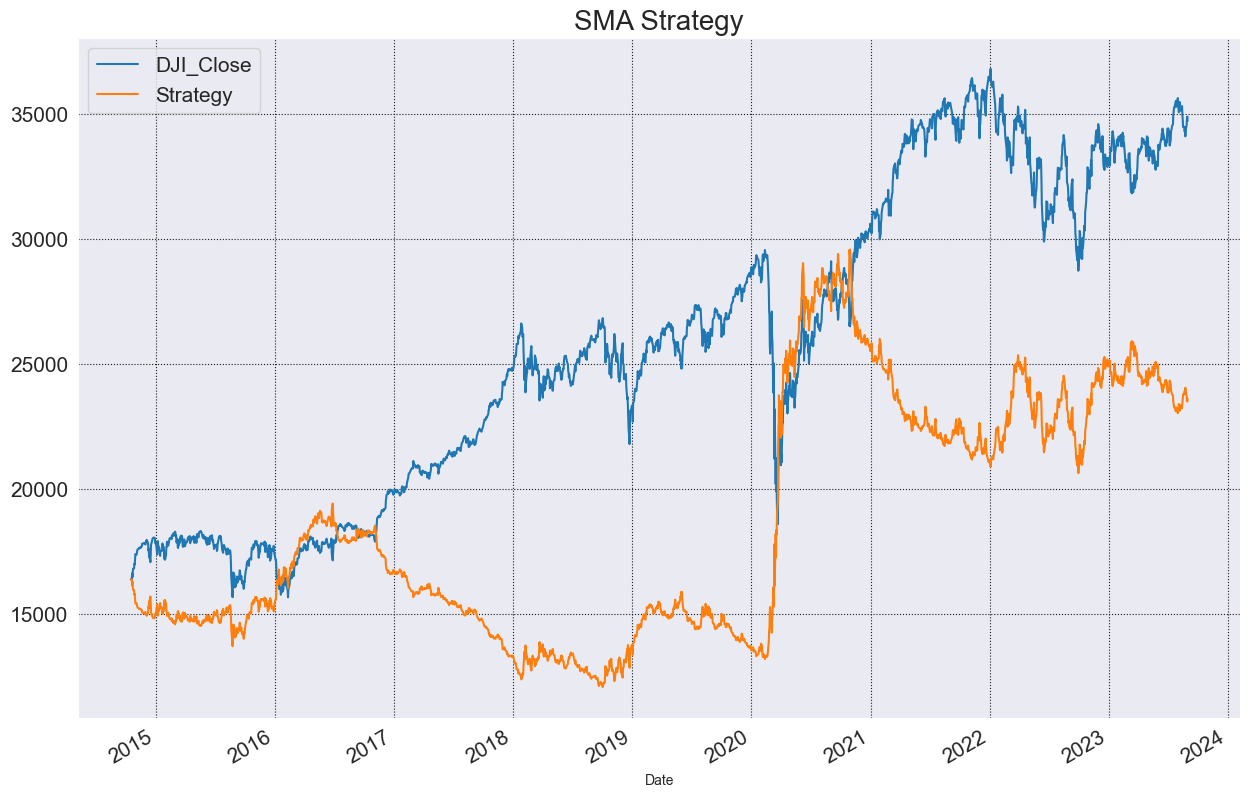

In [50]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("SMA Strategy", fontsize = 20)
plt.show()

In [51]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.103276,0.182027
Strategy_Ret,0.057654,0.182065


## Backtesting the Perfect Strategy (...in case you know the future...)

In [52]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-01,11219.540039,11313.599609,11219.540039,11238.780273,11238.780273,125140000
2000-09-05,11221.759766,11301.669922,11184.769531,11260.610352,11260.610352,174500000
2000-09-06,11253.580078,11401.190430,11253.209961,11310.639648,11310.639648,224760000
2000-09-07,11316.009766,11323.870117,11223.240234,11259.870117,11259.870117,222220000
2000-09-08,11261.719727,11261.719727,11191.049805,11220.650391,11220.650391,181620000
...,...,...,...,...,...,...
2023-08-25,34217.058594,34441.910156,34029.218750,34346.898438,34346.898438,257440000
2023-08-28,34441.640625,34652.910156,34441.640625,34559.980469,34559.980469,224640000
2023-08-29,34531.121094,34864.421875,34531.121094,34852.671875,34852.671875,262550000


In [53]:
df = data.loc["2014":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2014-01-03,16469.990234,0.001742
2014-01-06,16425.099609,-0.002726
2014-01-07,16530.939453,0.006444
2014-01-08,16462.740234,-0.004126
2014-01-09,16444.759766,-0.001092
...,...,...
2023-08-25,34346.898438,0.007258
2023-08-28,34559.980469,0.006204
2023-08-29,34852.671875,0.008469


In [54]:
df["Position"] = np.sign(df["DJI_Return"])
df

,DJI_Close,DJI_Return,Position
Date,,,
2014-01-03,16469.990234,0.001742,1.0
2014-01-06,16425.099609,-0.002726,-1.0
2014-01-07,16530.939453,0.006444,1.0
2014-01-08,16462.740234,-0.004126,-1.0
2014-01-09,16444.759766,-0.001092,-1.0
...,...,...,...
2023-08-25,34346.898438,0.007258,1.0
2023-08-28,34559.980469,0.006204,1.0
2023-08-29,34852.671875,0.008469,1.0


In [55]:
df["Strategy_Ret"] = df["Position"] * df["DJI_Return"]
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2014-01-03,16469.990234,0.001742,1.0,0.001742
2014-01-06,16425.099609,-0.002726,-1.0,0.002726
2014-01-07,16530.939453,0.006444,1.0,0.006444
2014-01-08,16462.740234,-0.004126,-1.0,0.004126
2014-01-09,16444.759766,-0.001092,-1.0,0.001092
...,...,...,...,...
2023-08-25,34346.898438,0.007258,1.0,0.007258
2023-08-28,34559.980469,0.006204,1.0,0.006204
2023-08-29,34852.671875,0.008469,1.0,0.008469


In [56]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2014-01-03,16469.990234,0.001742,1.0,0.001742,1.649868e+04
2014-01-06,16425.099609,-0.002726,-1.0,0.002726,1.654365e+04
2014-01-07,16530.939453,0.006444,1.0,0.006444,1.665025e+04
2014-01-08,16462.740234,-0.004126,-1.0,0.004126,1.671894e+04
2014-01-09,16444.759766,-0.001092,-1.0,0.001092,1.673721e+04
...,...,...,...,...,...
2023-08-25,34346.898438,0.007258,1.0,0.007258,4.030636e+11
2023-08-28,34559.980469,0.006204,1.0,0.006204,4.055642e+11
2023-08-29,34852.671875,0.008469,1.0,0.008469,4.089989e+11


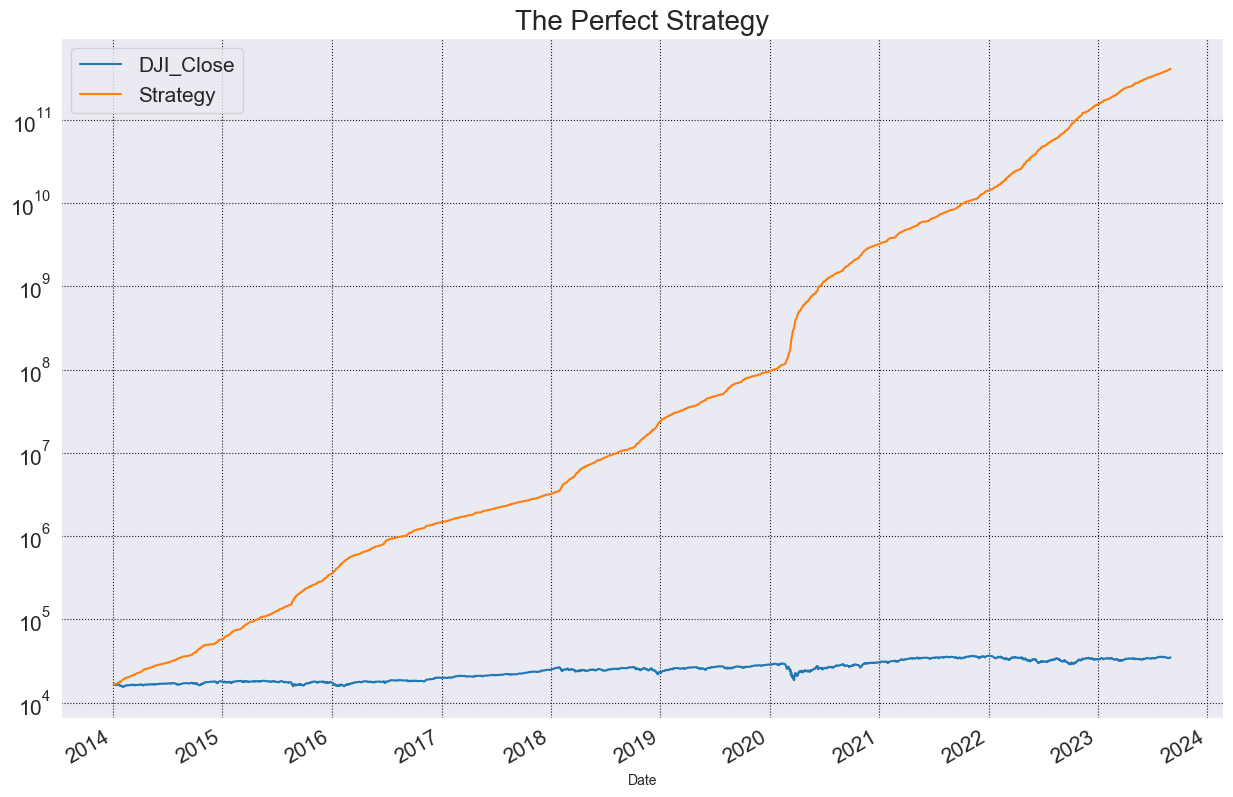

In [57]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15, logy = True)
plt.legend(fontsize = 15)
plt.title("The Perfect Strategy", fontsize = 20)
plt.show()

In [58]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.093213,0.176990
Strategy_Ret,1.780265,0.137032
